In [3]:
##Import Libraries##

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import pandas as pd
from scipy.interpolate import interp1d

In [14]:
## Calculate density at each temperature using the thermal expansion formula ##

rho_0 = 8000              # Density of stainless steel 316 at 20°C (kg/m³)
T_0 = 20                  # Reference temperature (°C)
alpha = 16.0e-6           # Linear thermal expansion coefficient of stainless steal (1/°C)
temperatures = np.array([21, 25, 49, 50, 51, 52, 90]) # Temperature values

SS_den = rho_0 / (1 + alpha * (temperatures - T_0))         # ρ' = ρ/(1+αΔΤ) equation for density at temp T
Water_den = np.array([997.9731, 997.043, 988.4527, 
                      988.0165, 987.546, 987.0755, 961.89]) # values of water density
R = SS_den / Water_den                                      # Steinless steal density / water density
df = pd.DataFrame({'Temp (°C)': temperatures, 'SS_Den (kg/m³)': 
                   SS_den, 'W_Den (kg/m3)': Water_den, 'Density Ratio':R})
print(df)


   Temp (°C)  SS_Den (kg/m³)  W_Den (kg/m3)  Density Ratio
0         21     7999.872002       997.9731       8.016120
1         25     7999.360051       997.0430       8.023084
2         49     7996.289722       988.4527       8.089704
3         50     7996.161842       988.0165       8.093146
4         51     7996.033967       987.5460       8.096872
5         52     7995.906096       987.0755       8.100602
6         90     7991.050024       961.8900       8.307655


In [ ]:
## Hollow Cylinder particles (Aspect Ratio Diameter-Height 1:1) ##

For x = 93.02 mm, y = 2.0004181594811397 mm


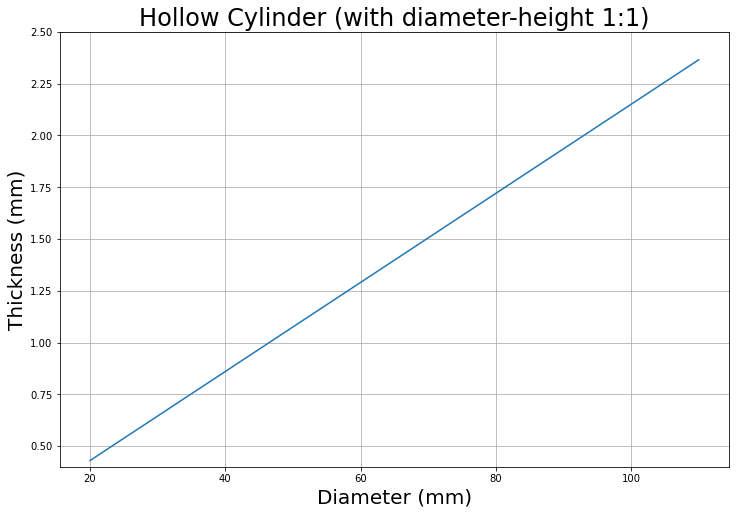

In [24]:
R = 8.093146             # Define R value for Stainless Steal 316 at 50C
def cubic_equation(y, x):
    return R * y * (3 * x**2 - 3 * x * y + y**2) - x**3   #equation 1

def compute_y_for_x(x_values):
    y_values = []
    for x in x_values:
        roots = fsolve(cubic_equation, x0=[0.1], args=(x))  
        real_roots = roots[np.isreal(roots)].real 
        y_values.append(real_roots[0])
    return np.array(y_values)

x_values = np.linspace(10, 55, 100)
y_values = compute_y_for_x(x_values)
#specific value
specific_x_values = [46.51]
y_results = compute_y_for_x(specific_x_values)
for x, y in zip(specific_x_values, y_results):
    print(f"For x = {x*2} mm, y = {y} mm")
#Plot
plt.figure(figsize=(12, 8))
plt.plot(x_values*2, y_values, label="Solved Thickness y(x)")
plt.title("Hollow Cylinder (with diameter-height 1:1)", fontsize=24)
plt.xlabel("Diameter (mm)", fontsize=20)
plt.ylabel("Thickness (mm)", fontsize=20)
plt.ylim(0.4, 2.5)
plt.grid(True)
plt.show()

In [ ]:
## Hollow Cylinder Mass ##

In [6]:
# Define the dimentions of the hollow cylnder
rho = 8000         # density of Stainless steal at 20C
x = 0.020          # Diameter in meters
t = 0.00086        # Thickness in meters
pi = 3.141592      # π

# Calculate the mass
m = rho*2*pi*t*(3*x**2-3*x*t+t**2)*1000

print(f"mass has to be: {m:.6f} grams")

mass has to be: 49.675358 grams


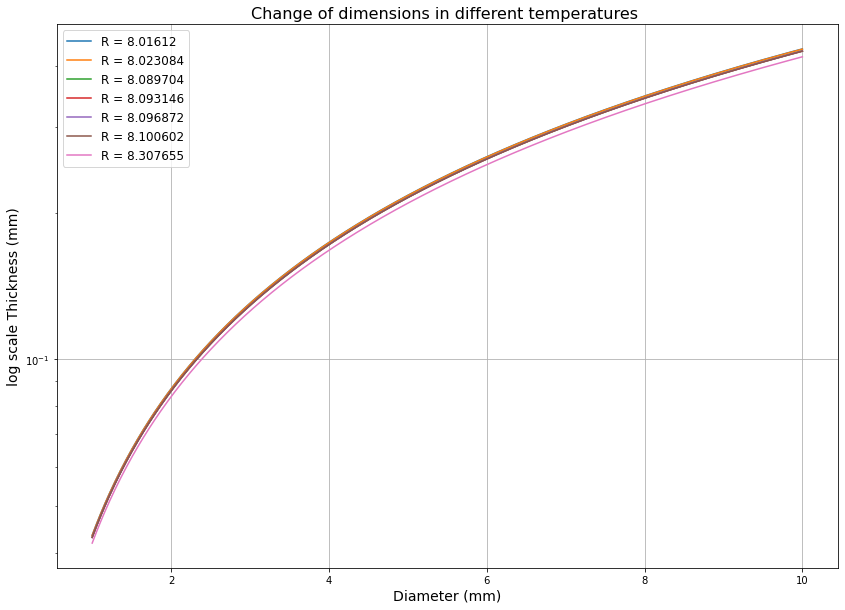

In [9]:
## Compare the density ratio in different temperature ##

R_values = [8.016120, 8.023084, 8.089704, 8.093146, 8.096872, 8.100602, 8.307655]

def cubic_equation(y, x, R):
    return R * y * (3 * x**2 - 3 * x * y + y**2) - x**3
x_values = np.linspace(1, 10, 500)
plt.figure(figsize=(14, 10))

for R in R_values:
    y_values = []
    for x in x_values:
        roots = fsolve(cubic_equation, x0=[0.1], args=(x, R))
        real_roots = roots[np.isreal(roots)].real
        y_values.append(real_roots[0])  
    y_values = np.array(y_values)
    plt.plot(x_values, y_values, label=f"R = {R}")
plt.yscale('log')

# Plot
plt.title("Change of dimensions in different temperatures ", fontsize=16)
plt.xlabel("Diameter (mm)", fontsize=14)
plt.ylabel("log scale Thickness (mm)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
## Particle Density check at Temperature T ##

In [11]:
# Minimum Density
rho = 7999.360051     # density at Room Temperature
x = 0.02005           # max diameter in meters
t = 0.862*(10**-3)    # max thickness in meters
pi = 3.141592  
T0 = 20
T  = 50
m = rho*2*pi*t*(3*x**2-3*x*t+t**2)
alp = 16*(10**-6)
DT = T - T0
ρ = m / (2*pi*(x**3)*(1+alp*DT)**3)
print(f" max mass is: {m*1000:.6f} grams")
print(f" min density is: {ρ:.6f} kg/m^3")

 max mass is: 50.036525 grams
 min density is: 986.595193 kg/m^3


In [12]:
# Maxmum density
rho = 7999.360051
x = 0.01995              # min diameter in meters           
t = 0.861*(10**-3)       # min thickness in meters
pi = 3.141592  
m = rho*2*pi*t*(3*x**2-3*x*t+t**2)
T0 = 20
T  = 50
m = rho*2*pi*t*(3*x**2-3*x*t+t**2)
alp = 16*(10**-6)
DT = T - T0
ρ = m / (2*pi*(x**3)*(1+alp*DT)**3)
print(f" min mass is: {m*1000:.6f} grams")
print(f" max density is: {ρ:.6f} kg/m^3")

 min mass is: 49.472883 grams
 max density is: 990.224130 kg/m^3


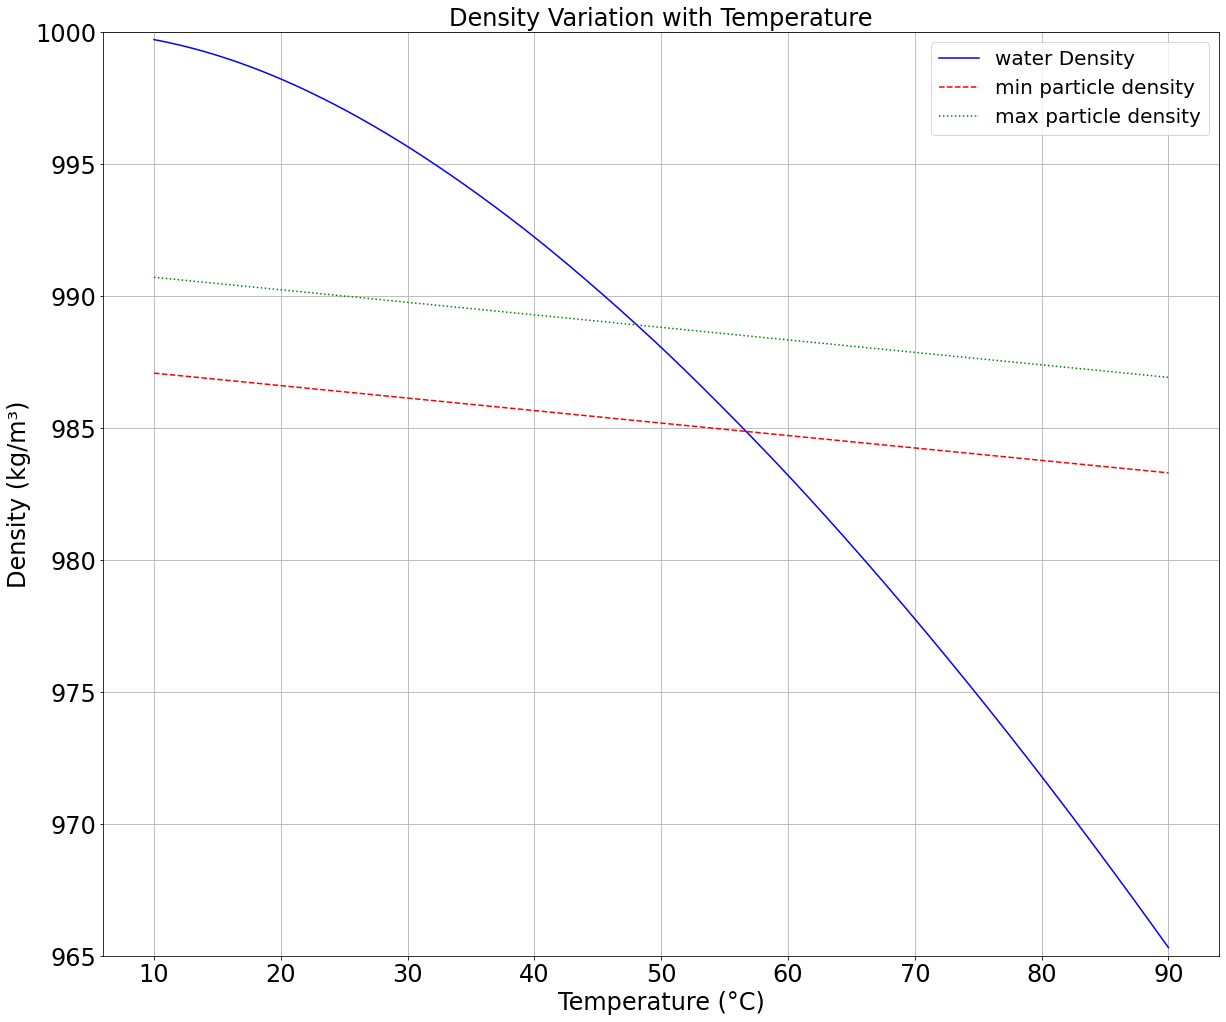

In [40]:
# Define given temperature-density data
temperature_data = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
density_data = np.array([999.7, 999.1, 998.21, 997.05, 995.65, 994.03, 992.22, 990.21, 988.04, 985.69, 
                         983.2, 980.55, 977.76, 974.84, 971.79, 968.61, 965.31, 961.89, 958.35])

# Define constants for equations 2 and 3
a = 16 * 10**-6
To = 20
rho_pmax = 990.224130
rho_pmin = 986.595193

# Define x values (temperature range from 10°C to 90°C)
x_values = np.linspace(10, 90, 500)

# Interpolate the density data to estimate values between given points
interpolated_density = interp1d(temperature_data, density_data, kind='cubic')

# Compute y values for equation 2 and 3
y2min_values = rho_pmin / (1 + 3 * a * (x_values - To))  # Equation 2
y2max_values = rho_pmax / (1 + 3 * a * (x_values - To))  # Equation 3

# Get the interpolated y-values from data for equation 1
y_values = interpolated_density(x_values)  # Interpolated density values

plt.figure(figsize=(20, 17))
plt.tick_params(axis='both', labelsize=24)  # Increase tick label size for both axes
plt.plot(x_values, y_values, label="water Density ", color='blue', linestyle='solid')
plt.plot(x_values, y2min_values, label= 'min particle density', color='red', linestyle='dashed')
plt.plot(x_values, y2max_values, label= 'max particle density', color='green', linestyle='dotted')
plt.title("Density Variation with Temperature", fontsize=24)
plt.xlabel("Temperature (°C)", fontsize=24)
plt.ylabel("Density (kg/m³)", fontsize=24)
plt.legend(fontsize=20)
plt.ylim([965, 1000])
plt.grid(True)
plt.show()


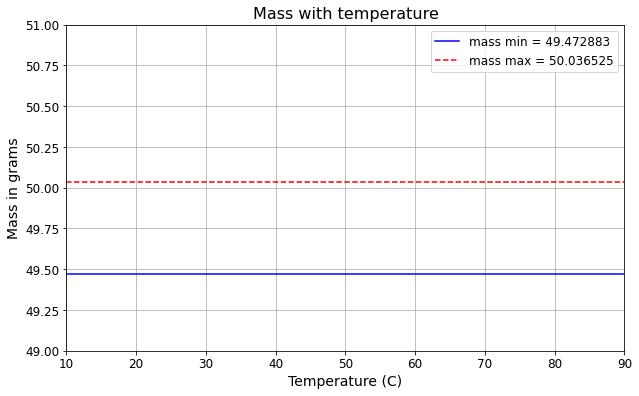

In [42]:
mmax = 50.036525
mmin = 49.472883

# Create the plot
plt.figure(figsize=(10, 6))

# Plot horizontal lines
plt.axhline(y=mmin, color='blue', linestyle='-', label=f'mass min = {mmin}')
plt.axhline(y=mmax, color='red', linestyle='--', label=f'mass max = {mmax}')

# Formatting the plot

plt.xlabel("Temperature (C)", fontsize=14)
plt.ylabel("Mass in grams", fontsize=14)
plt.title("Mass with temperature", fontsize=16)
plt.ylim(49, 51)
plt.xlim(10, 90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
################ SPHERE CALCULATIONS ##########################33 

Enter a value for x: 23.35
For x = 23.35, the corresponding t value is: 1.004


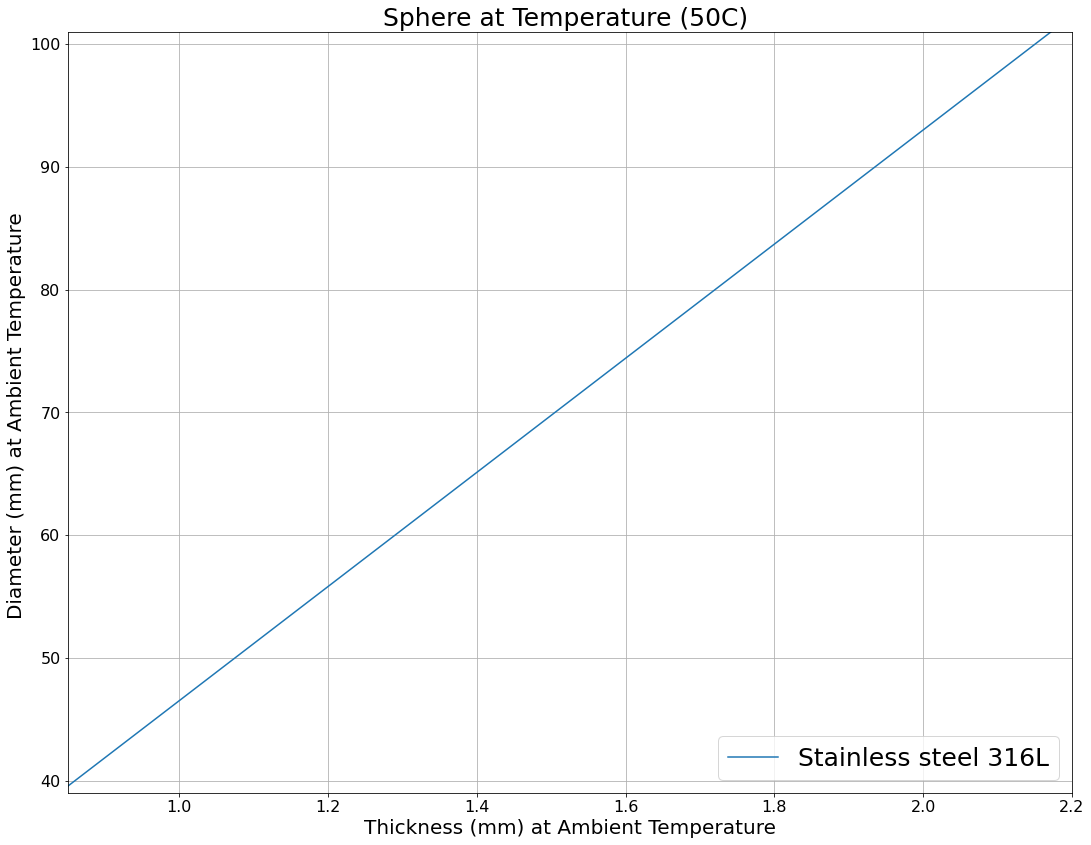

In [46]:
R = 8.09314 # value of density ratio at T = 50C
# Define the equation to solve for t
def equation(t, x):
    return R * (3 * t * x**2 - 3 * x * t**2 + t**3) - x**3
x_values = np.linspace(10, 100, 500)  # 500 points for smooth plot
t_values = []
for x in x_values:
    root = fsolve(equation, x0=0.01, args=(x))  # Initial guess for t
    real_roots = root[np.isreal(root)].real  # Extract real solutions
    if len(real_roots) > 0:
        t_values.append(real_roots[0])  # Choose the first valid root
    else:
        t_values.append(np.nan)  # Avoid complex solutions
x_values = np.array(x_values)
t_values = np.array(t_values)
x_value = float(input("Enter a value for x: "))
root = fsolve(equation, x0=0.01, args=(x_value))  # Initial guess for t
real_roots = root[np.isreal(root)].real  # Extract real solutions
if len(real_roots) > 0:
    t_value = real_roots[0]  # Choose the first valid root
    print(f"For x = {x_value:.2f}, the corresponding t value is: {t_value:.3f}")
else:
    print("No real solution found.")

plt.figure(figsize=(18, 14))
plt.plot(t_values, x_values*2)

plt.legend(["Stainless steel 316L"], loc="lower right", fontsize=25)
plt.xlabel("Thickness (mm) at Ambient Temperature", fontsize=20)
plt.ylabel("Diameter (mm) at Ambient Temperature ", fontsize=20)
plt.title("Sphere at Temperature (50C) ", fontsize=25)
plt.ylim([39, 101])
plt.xlim([0.85, 2.2])
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


In [52]:
#SPHRE MASS
# Define dimensions
rho = 8000         # density of stainless steal at 20C
x = 0.02335        # radius in meters
t = 0.001          # thickness in meters
pi = 3.141592
m = rho*4/3*pi*(3*t*x**2-3*x*t**2+t**3)*1000
print(f"mass has to be exact: {m:.6f} grams")

mass has to be exact: 52.497845 grams


In [49]:
#max SPHERE MASS   
rho = 8000
# max radius
x = 0.0234         #value in meters
t = 0.001
pi = 3.141592
a = 16*10**-6
DT = 30

# Compute m
m = rho*4/3*pi*(3*t*x**2-3*x*t**2+t**3)
Vp_ = 4/3*pi*(x**3)*(1+a*DT)**3
ρ = m/Vp_

print(f"max mass: {m*1000:.4f} grams")
print(f"min density: {ρ:.4f} kg/m^3")

max mass: 52.7278 grams
min density: 981.0212 kg/m^3


In [50]:
#min SPHERE MASS
rho = 8000
# min radius
x = 0.0233         #value in meters
t = 0.001
pi = 3.141592  
a = 16*10**-6
DT = 30

# Compute m
m = rho*4/3*pi*(3*t*x**2-3*x*t**2+t**3)
Vp_ = 4/3*pi*(x**3)*(1+a*DT)**3
ρ = m/Vp_

print(f"min mass: {m*1000:.4f} grams")
print(f"max density: {ρ:.4f} kg/m^3")

min mass: 52.2684 grams
max density: 985.0484 kg/m^3


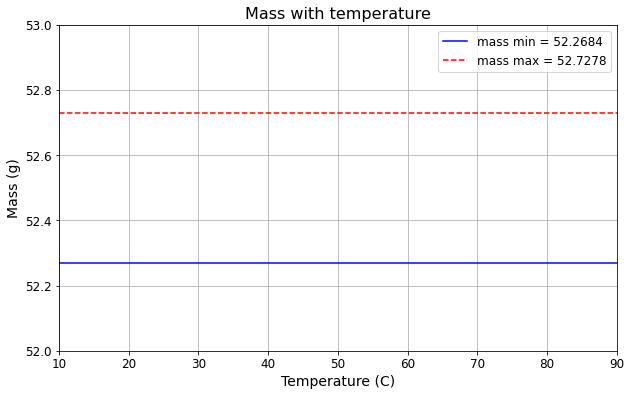

In [53]:
mmax = 52.7278
mmin = 52.2684

# Create the plot
plt.figure(figsize=(10, 6))

# Plot horizontal lines
plt.axhline(y=mmin, color='blue', linestyle='-', label=f'mass min = {mmin}')
plt.axhline(y=mmax, color='red', linestyle='--', label=f'mass max = {mmax}')

# Formatting the plot

plt.xlabel("Temperature (C)", fontsize=14)
plt.ylabel("Mass (g)", fontsize=14)
plt.title("Mass with temperature", fontsize=16)

plt.xlim(10, 90)
plt.ylim(52, 53)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

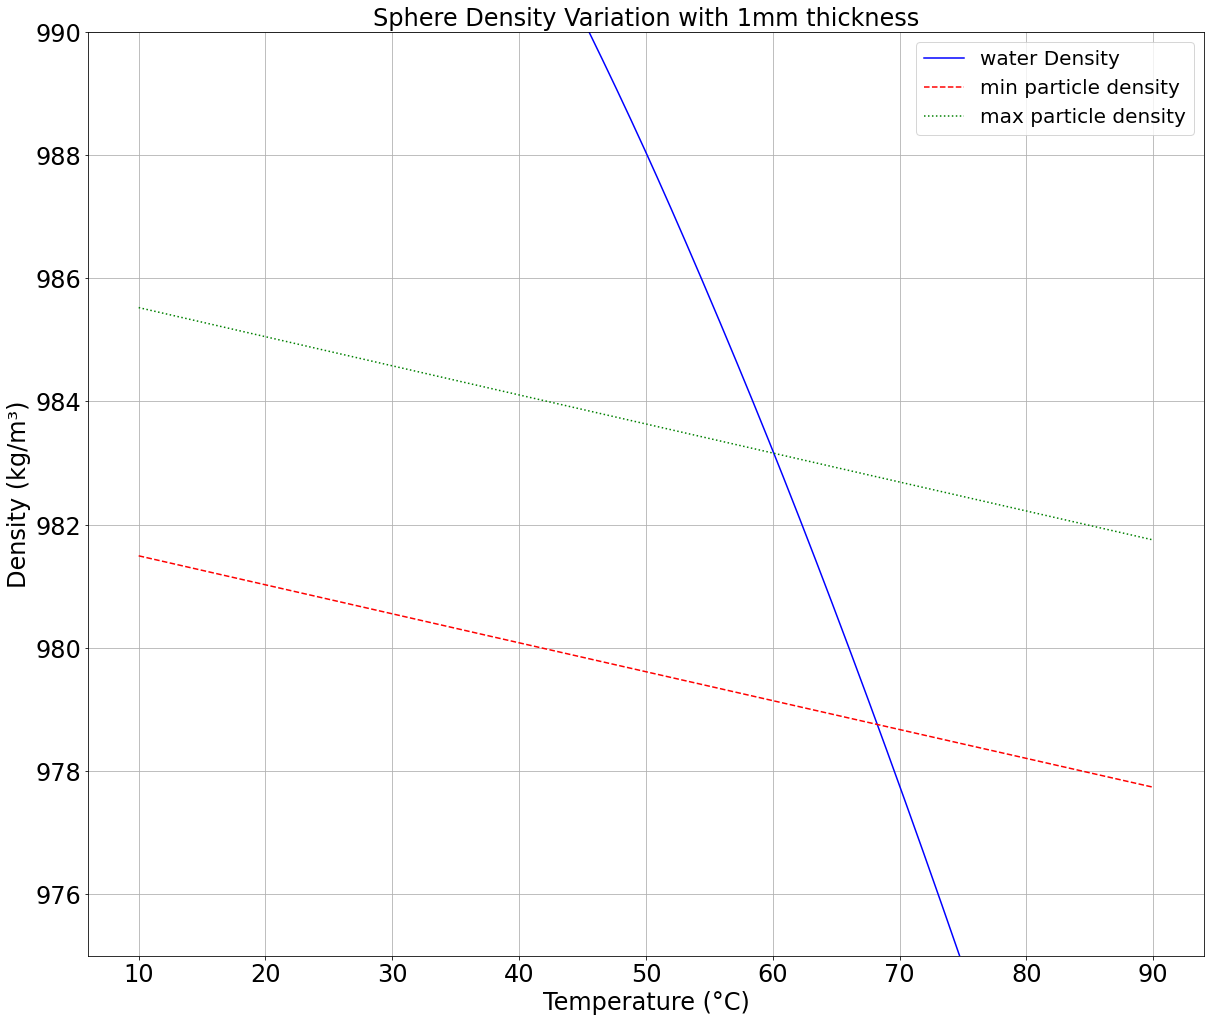

In [55]:
# Define given temperature-density data
temperature_data = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
density_data = np.array([999.7, 999.1, 998.21, 997.05, 995.65, 994.03, 992.22, 990.21, 988.04, 985.69, 
                         983.2, 980.55, 977.76, 974.84, 971.79, 968.61, 965.31, 961.89, 958.35])

# Define constants for equations 2 and 3
a = 16 * 10**-6
To = 20
rho_pmax = 985.0484
rho_pmin = 981.0212

# Define x values (temperature range from 10°C to 90°C)
x_values = np.linspace(10, 90, 500)

# Interpolate the density data to estimate values between given points
interpolated_density = interp1d(temperature_data, density_data, kind='cubic')

# Compute y values for equation 2 and 3
y2min_values = rho_pmin / (1 + 3 * a * (x_values - To))  # Equation 2
y2max_values = rho_pmax / (1 + 3 * a * (x_values - To))  # Equation 3

# Get the interpolated y-values from data for equation 1
y_values = interpolated_density(x_values)  # Interpolated density values

# Create the plot
plt.figure(figsize=(20, 17))
plt.tick_params(axis='both', labelsize=24)  # Increase tick label size for both axes
plt.plot(x_values, y_values, label="water Density ", color='blue', linestyle='solid')
plt.plot(x_values, y2min_values, label= 'min particle density', color='red', linestyle='dashed')
plt.plot(x_values, y2max_values, label= 'max particle density', color='green', linestyle='dotted')

# Formatting the plot
plt.title("Sphere Density Variation with 1mm thickness", fontsize=24)
plt.xlabel("Temperature (°C)", fontsize=24)
plt.ylabel("Density (kg/m³)", fontsize=24)
plt.legend(fontsize=20)
plt.ylim([975, 990])
plt.grid(True)

# Show the plot
plt.show()


max mass: 419.2480 grams
min density: 983.8368 kg/m^3
max mass: 421.0861 grams
min density: 981.8240 kg/m^3


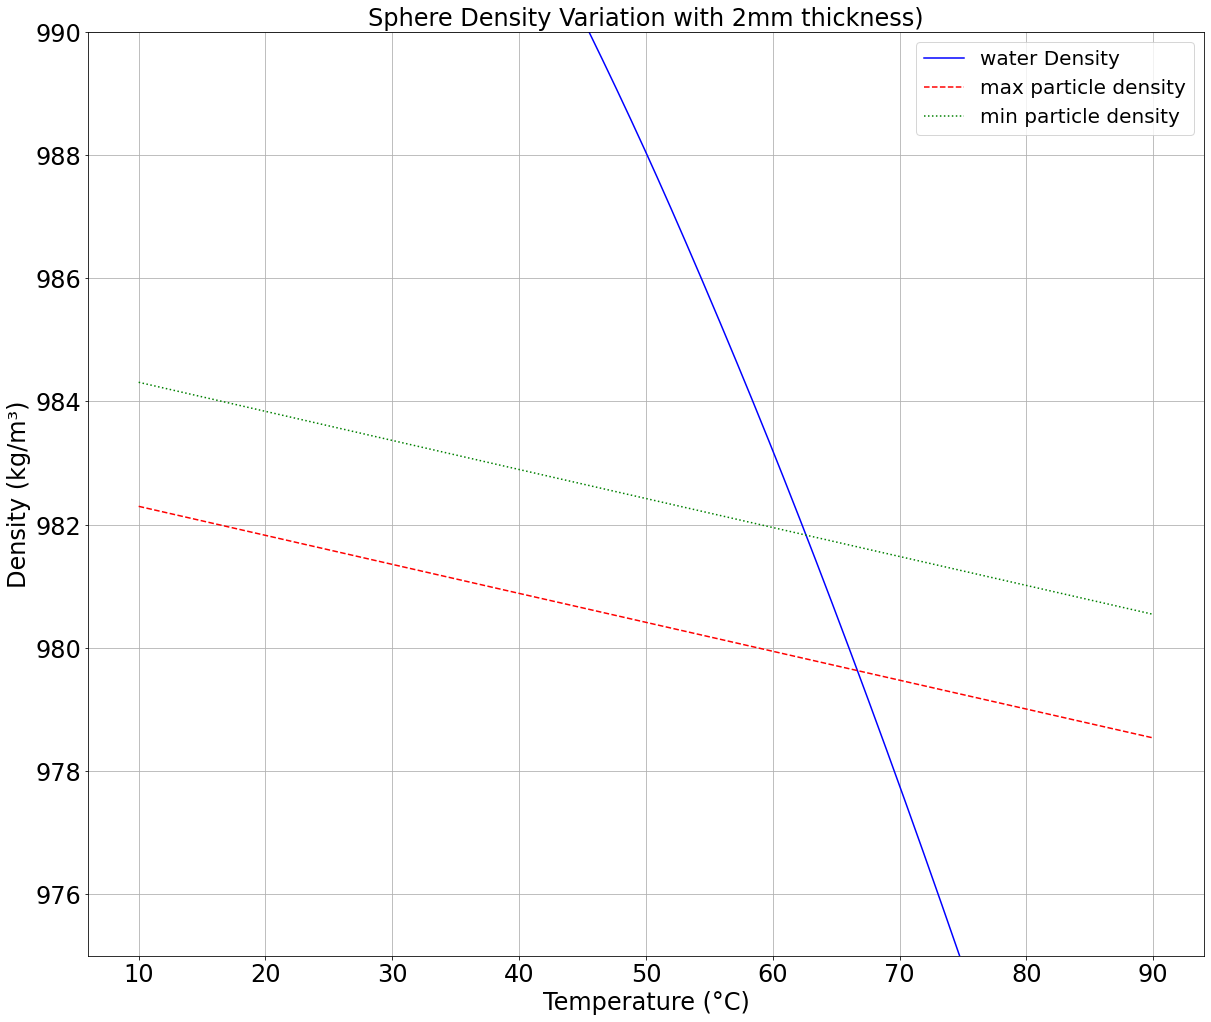

In [58]:
rho = 8000
x_i = 0.04666         #value in meters x = 46.61mm
t = 0.002
pi = 3.141592
a = 16*10**-6
DT = 30

m_i = rho*4/3*pi*(3*t*x_i**2-3*x_i*t**2+t**3)
Vp_i = 4/3*pi*(x_i**3)*(1+a*DT)**3
ρ_i = m_i/Vp_i

print(f"max mass: {m_i*1000:.4f} grams")
print(f"min density: {ρ_i:.4f} kg/m^3")

x_a = 0.04676        
m_a = rho*4/3*pi*(3*t*x_a**2-3*x_a*t**2+t**3)
Vp_a = 4/3*pi*(x_a**3)*(1+a*DT)**3
ρ_a = m_a/Vp_a

print(f"max mass: {m_a*1000:.4f} grams")
print(f"min density: {ρ_a:.4f} kg/m^3")

temperature_data = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
density_data = np.array([999.7, 999.1, 998.21, 997.05, 995.65, 994.03, 992.22, 990.21, 988.04, 985.69, 
                         983.2, 980.55, 977.76, 974.84, 971.79, 968.61, 965.31, 961.89, 958.35])
To = 20
x_values = np.linspace(10, 90, 500)
interpolated_density = interp1d(temperature_data, density_data, kind='cubic')
y2min_values = ρ_a / (1 + 3 * a * (x_values - To))  # Equation 2
y2max_values = ρ_i / (1 + 3 * a * (x_values - To))  # Equation 3
y_values = interpolated_density(x_values)  # Interpolated density values
plt.figure(figsize=(20, 17))
plt.tick_params(axis='both', labelsize=24)  # Increase tick label size for both axes
plt.plot(x_values, y_values, label="water Density ", color='blue', linestyle='solid')
plt.plot(x_values, y2min_values, label= 'max particle density', color='red', linestyle='dashed')
plt.plot(x_values, y2max_values, label= 'min particle density', color='green', linestyle='dotted')
plt.title("Sphere Density Variation with 2mm thickness)", fontsize=24)
plt.xlabel("Temperature (°C)", fontsize=24)
plt.ylabel("Density (kg/m³)", fontsize=24)
plt.legend(fontsize=20)
plt.ylim([975, 990])
plt.grid(True)
plt.show()


max mass: 175.2730 grams
min density: 988.0226 kg/m^3
min mass: 176.3027 grams
max density: 985.3180 kg/m^3


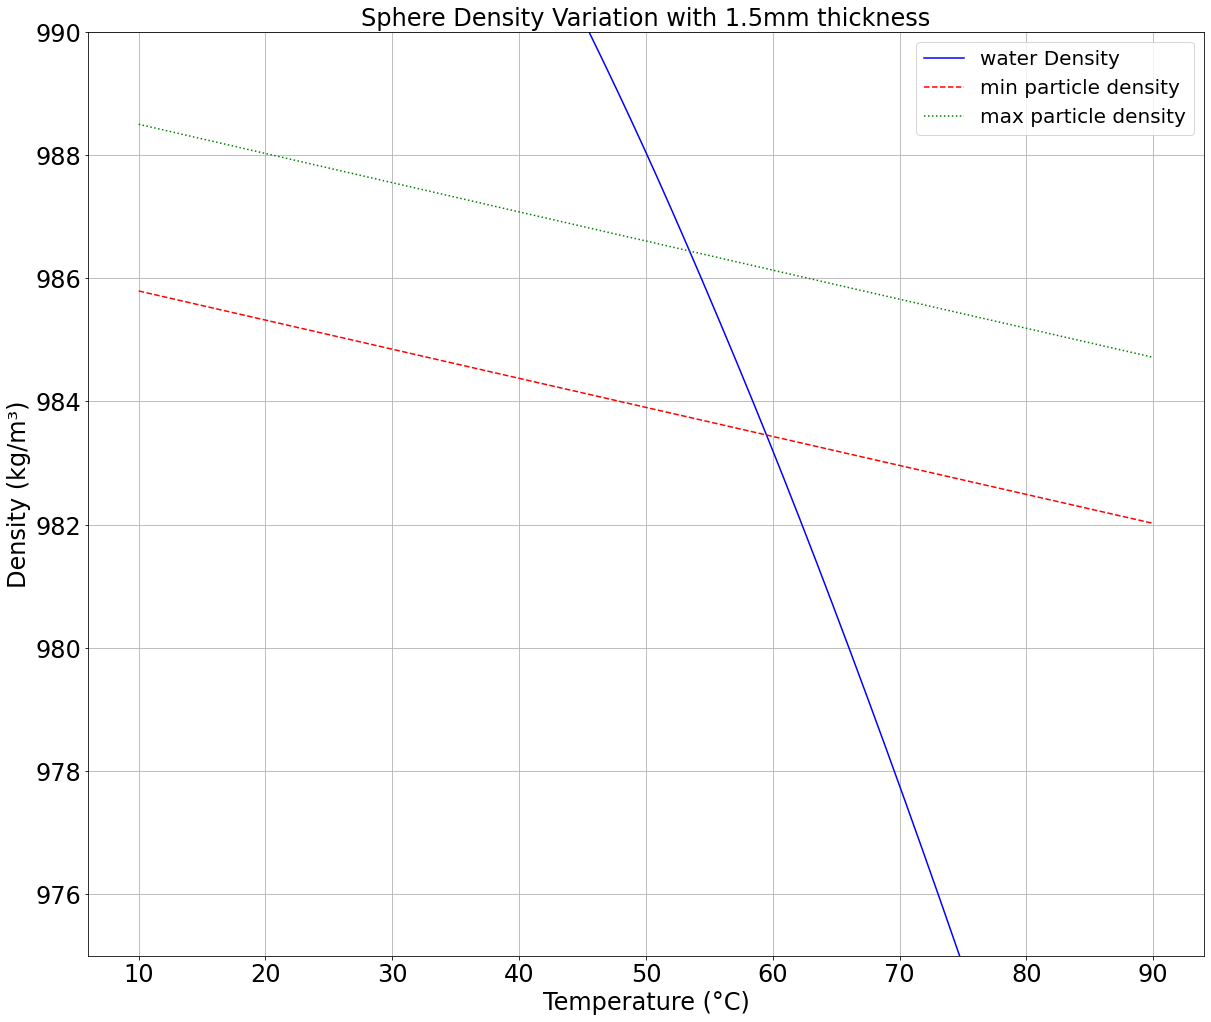

In [60]:
rho = 8000
x_i = 0.03484         #value in meters x = 34.89mm
t = 0.0015
pi = 3.141592
a = 16*10**-6
DT = 30

m_i = rho*4/3*pi*(3*t*x_i**2-3*x_i*t**2+t**3)
Vp_i = 4/3*pi*(x_i**3)*(1+a*DT)**3
ρ_i = m_i/Vp_i

print(f"max mass: {m_i*1000:.4f} grams")
print(f"min density: {ρ_i:.4f} kg/m^3")

x_a = 0.03494        
m_a = rho*4/3*pi*(3*t*x_a**2-3*x_a*t**2+t**3)
Vp_a = 4/3*pi*(x_a**3)*(1+a*DT)**3
ρ_a = m_a/Vp_a

print(f"min mass: {m_a*1000:.4f} grams")
print(f"max density: {ρ_a:.4f} kg/m^3")

temperature_data = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
density_data = np.array([999.7, 999.1, 998.21, 997.05, 995.65, 994.03, 992.22, 990.21, 988.04, 985.69, 
                         983.2, 980.55, 977.76, 974.84, 971.79, 968.61, 965.31, 961.89, 958.35])
To = 20
x_values = np.linspace(10, 90, 500)
interpolated_density = interp1d(temperature_data, density_data, kind='cubic')
y2min_values = ρ_a / (1 + 3 * a * (x_values - To))  # Equation 2
y2max_values = ρ_i / (1 + 3 * a * (x_values - To))  # Equation 3
y_values = interpolated_density(x_values)  # Interpolated density values
plt.figure(figsize=(20, 17))
plt.tick_params(axis='both', labelsize=24)  # Increase tick label size for both axes
plt.plot(x_values, y_values, label="water Density ", color='blue', linestyle='solid')
plt.plot(x_values, y2min_values, label= 'min particle density', color='red', linestyle='dashed')
plt.plot(x_values, y2max_values, label= 'max particle density', color='green', linestyle='dotted')
plt.title("Sphere Density Variation with 1.5mm thickness", fontsize=24)
plt.xlabel("Temperature (°C)", fontsize=24)
plt.ylabel("Density (kg/m³)", fontsize=24)
plt.legend(fontsize=20)
plt.ylim([975, 990])
plt.grid(True)
plt.show()


Radius (mm) | Mass (g)
--------------------
20           | 37.279387
30           | 85.308046
40           | 152.940238
50           | 240.175965


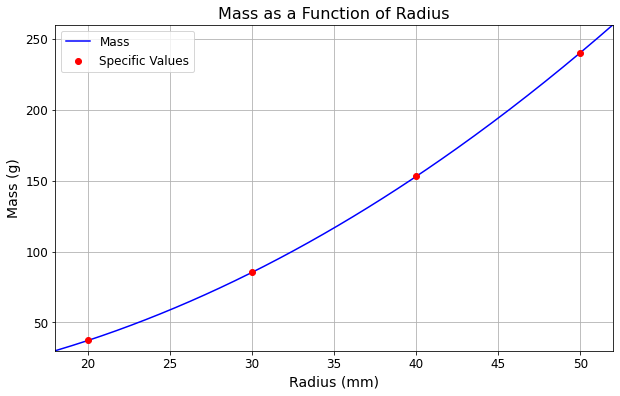

In [61]:
# Given constants
rho = 7800  # kg/m^3
t = 0.001   # meters
pi = 3.141592  # Approximate value of π

# Define the equation for mass
def mass_equation(x):
    return rho * (4/3) * pi * (3 * t * x**2 - 3 * x * t**2 + t**3) * 1000  # Convert to grams

# Specific x values to evaluate (in mm)
specific_x_values = [20, 30, 40, 50]  # mm
specific_x_values_m = np.array(specific_x_values) / 1000  # Convert mm to meters

# Compute y values
specific_m_values = mass_equation(specific_x_values_m)

# Print the results
print("Radius (mm) | Mass (g)")
print("--------------------")
for x, m in zip(specific_x_values, specific_m_values):
    print(f"{x:<12} | {m:.6f}")

# Generate x values for plotting (converted to meters)
x_values = np.linspace(10, 100, 500) / 1000  # Convert mm to meters
m_values = mass_equation(x_values)  # Compute m values

# Plot the equation
plt.figure(figsize=(10, 6))
plt.plot(x_values * 1000, m_values, label='Mass', color='b')
plt.scatter(specific_x_values, specific_m_values, color='red', label='Specific Values', zorder=3)

# Formatting the plot
plt.xlabel("Radius (mm)", fontsize=14)
plt.ylabel("Mass (g)", fontsize=14)
plt.title("Mass as a Function of Radius", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xlim([18, 52])
plt.ylim([30, 260])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

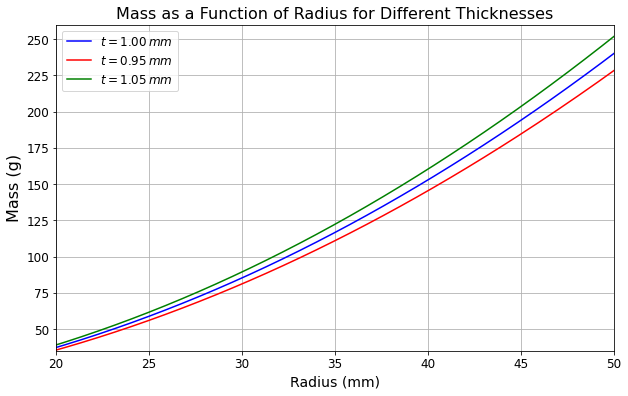

In [62]:
# Given constants
rho = 7800  # kg/m^3
pi = 3.141592  # Approximate value of π

# Function to compute mass for a given thickness t
def mass_equation(x, t):
    return rho * (4/3) * pi * (3 * t * x**2 - 3 * x * t**2 + t**3) * 1000  # Convert to grams

# Generate x values from 10 to 100 mm (converted to meters)
x_values = np.linspace(10, 100, 500) / 1000  # Convert mm to meters

# Define different t values
t_values = [0.001, 0.00095, 0.00105]
labels = [r'$t = 1.00 \, mm$', r'$t = 0.95 \, mm$', r'$t = 1.05 \, mm$']
colors = ['b', 'r', 'g']

# Plot each curve
plt.figure(figsize=(10, 6))
for t, label, color in zip(t_values, labels, colors):
    m_values = mass_equation(x_values, t)
    plt.plot(x_values * 1000, m_values, label=label, color=color)

# Formatting the plot
plt.xlabel("Radius (mm)", fontsize=14)
plt.ylabel("Mass (g)", fontsize=16)
plt.title("Mass as a Function of Radius for Different Thicknesses", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.xlim([20, 50])
plt.ylim([35, 260])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

In [63]:
##################### TITANIUM ALLOY CALCULATIOS ############################

In [76]:
rho_0 = 5080  # Density of Alloy at 20°C (kg/m³)
T_0 = 20  # Reference temperature (°C)
alpha = -30e-6  # Linear thermal expansion coefficient (1/°C)
temperatures = np.array([21, 25, 49, 50, 51, 52, 90]) # Temperature values

# Calculate density at each temperature using the thermal expansion formula
SS_den = rho_0 / (1 + alpha * (temperatures - T_0)) # ρ' = ρ/(1+αΔΤ) equation for density at temperature T
Water_den = np.array([997.9731, 997.043, 988.4527, 988.0165, 987.546, 987.0755, 961.89]) # values of water dens
Ratio = SS_den / Water_den # the Ratio is the densities variation

# Create a DataFrame for better visualization
df = pd.DataFrame({'Temp (°C)': temperatures, 'ALLVAR Alloy 30_Den (kg/m³)': SS_den, 'Water_Den (kg/m³)': Water_den, 'Density Ratio':Ratio})
print(df)


   Temp (°C)  ALLVAR Alloy 30_Den (kg/m³)  Water_Den (kg/m³)  Density Ratio
0         21                  5080.152405           997.9731       5.090470
1         25                  5080.762114           997.0430       5.095830
2         49                  5084.423448           988.4527       5.143821
3         50                  5084.576119           988.0165       5.146246
4         51                  5084.728798           987.5460       5.148853
5         52                  5084.881486           987.0755       5.151462
6         90                  5090.690450           961.8900       5.292383


For x = 1 mm, y = 0.069489 mm
For x = 2 mm, y = 0.138978 mm
For x = 5 mm, y = 0.347445 mm
For x = 10 mm, y = 0.694890 mm
For x = 15 mm, y = 1.042335 mm
For x = 20 mm, y = 1.389780 mm
For x = 25 mm, y = 1.737225 mm
For x = 30 mm, y = 2.084670 mm


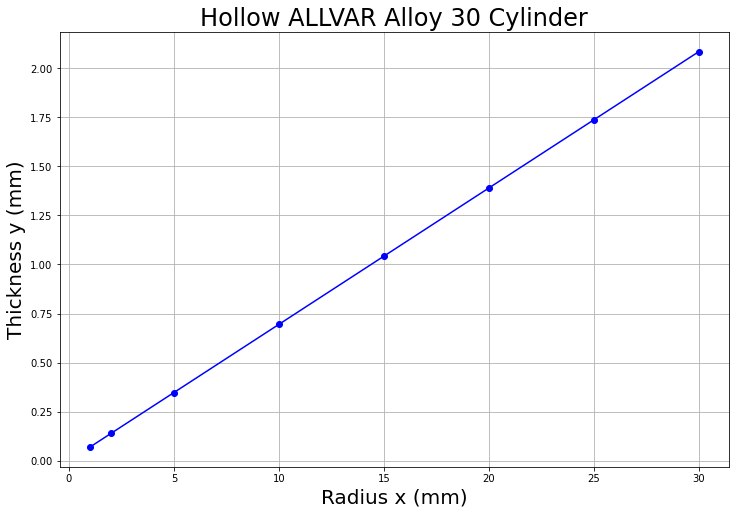

In [77]:
R = 5.146246
def cubic_equation(y, x):
    return R * y * (3 * x**2 - 3 * x * y + y**2) - x**3

# Function to compute y for specific x values
def compute_y_for_x(x_values):
    y_values = []
    for x in x_values:
        roots = fsolve(cubic_equation, x0=[0.1], args=(x))
        real_roots = roots[np.isreal(roots)].real
        y_values.append(real_roots[0])
    return y_values

# Specific x values to evaluate
specific_x_values = [1, 2, 5, 10, 15, 20, 25, 30]

# Compute corresponding y values
y_results = compute_y_for_x(specific_x_values)

# Print the results
for x, y in zip(specific_x_values, y_results):
    print(f"For x = {x} mm, y = {y:.6f} mm")

# Plotting the correct values
plt.figure(figsize=(12, 8))
plt.plot(specific_x_values, y_results, marker='o', linestyle='-', color='blue', label='Computed y(x)')

plt.title("Hollow ALLVAR Alloy 30 Cylinder", fontsize=24)
plt.xlabel("Radius x (mm)", fontsize=20)
plt.ylabel("Thickness y (mm)", fontsize=20)
plt.grid(True)
plt.show()


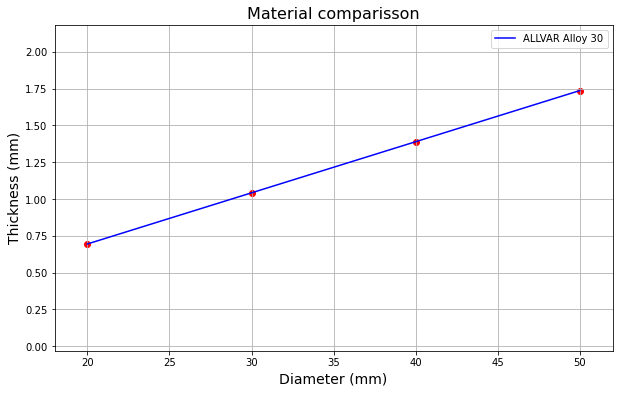

In [70]:
x_data = np.array([2, 4, 10, 20, 30, 40, 50, 60])  # diameter in mm
y_data = np.array([0.069489, 0.138978, 0.347445, 0.694890, 1.042335, 1.389780, 1.737225, 2.084670])  # mm

# Create an interpolation function
interp_func = interp1d(x_data, y_data, kind='cubic', fill_value='extrapolate')

# Generate new x values in the range [20, 50]
x_new = np.linspace(20, 50, 100)
y_new = interp_func(x_new)

# Plot the interpolated curve
plt.figure(figsize=(10, 6))
plt.plot(x_new, y_new, label='ALLVAR Alloy 30', color='b')
plt.scatter(x_data, y_data, color='r')                         #, label='Given Data'

# Formatting the plot
plt.xlim([18, 52])
plt.xlabel("Diameter (mm)", fontsize=14)
plt.ylabel("Thickness (mm)", fontsize=14)
plt.title("Material comparisson", fontsize=16)

plt.legend()
plt.grid()
plt.show()


In [ ]:
######################### SPHERE in Molten Salt ################

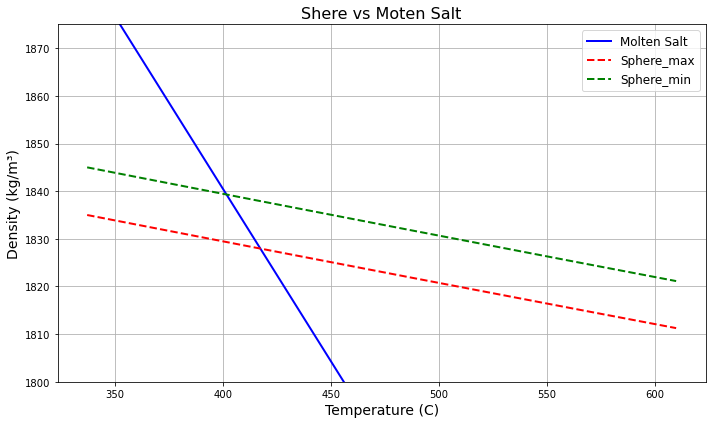

In [9]:
qN = 1900
qK = 1865
T0 = 337
rho_min = 1845
rho_max = 1835
a = 16e-6

# Temperature range
T_values = np.linspace(337, 610, 300)

# Calculate q_m (mixture density)
qN_T = qN - 0.723 * (T_values - T0)
qK_T = qK - 0.723 * (T_values - T0)
q_m = 0.6 * qN_T + 0.4 * qK_T

# Calculate y2
y2 = rho_max / (1 + 3 * a * (T_values - T0))
y3 = rho_min / (1 + 3 * a * (T_values - T0))
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(T_values, q_m, label='Molten Salt', color='blue', linewidth=2)
plt.plot(T_values, y2, label='Sphere_max', color='red', linestyle='--', linewidth=2)
plt.plot(T_values, y3, label='Sphere_min', color='green', linestyle='--', linewidth=2)
# Formatting
plt.xlabel("Temperature (C)", fontsize=14)
plt.ylabel("Density (kg/m³)", fontsize=14)
plt.title("Shere vs Moten Salt", fontsize=16)
plt.ylim([1800, 1875])
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()